**Predicting Diabetes using Random Forest Classifier**

**importing libraries**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [36]:
df=pd.read_csv('diabetes.csv')

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [41]:
df.shape

(768, 9)

In [42]:
df.isna().sum().sum()

0

In [43]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

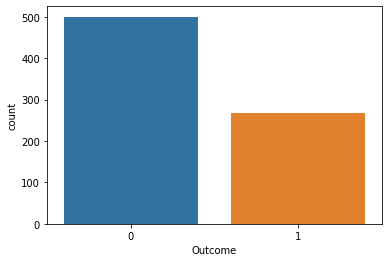

In [44]:
sns.countplot(data=df,x='Outcome')
plt.show()

In [45]:
#diabetes_true_count = len(df.loc[df['Outcome'] == True])
#diabetes_false_count = len(df.loc[df['Outcome'] == False])
##diabetes_true_count,diabetes_false_count

<AxesSubplot:>

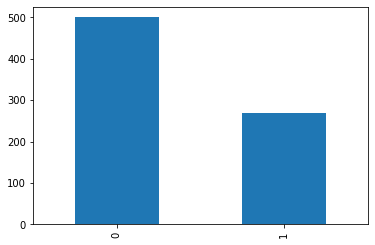

In [46]:
#or we can use plot 
df.Outcome.value_counts().plot(kind='bar')

In [47]:
df.corr()[['Outcome']]

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


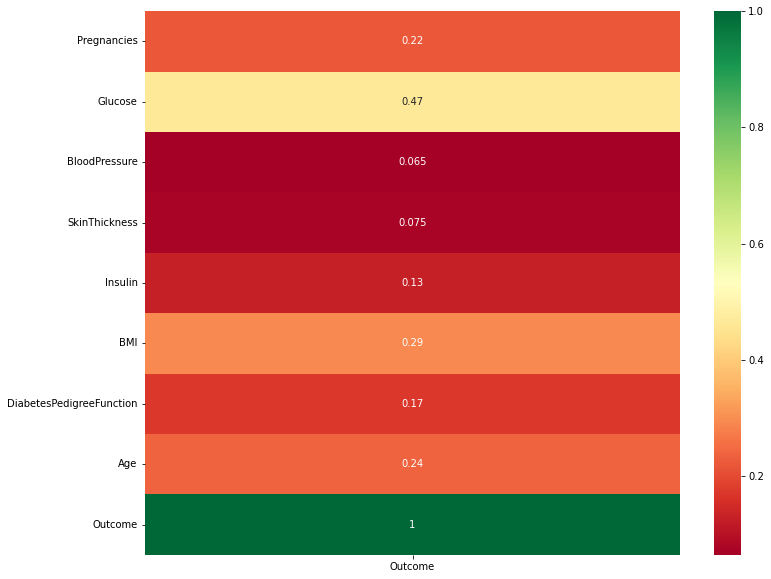

In [48]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr()[['Outcome']], annot=True,cmap ='RdYlGn')
plt.show()

In [49]:
df1=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]

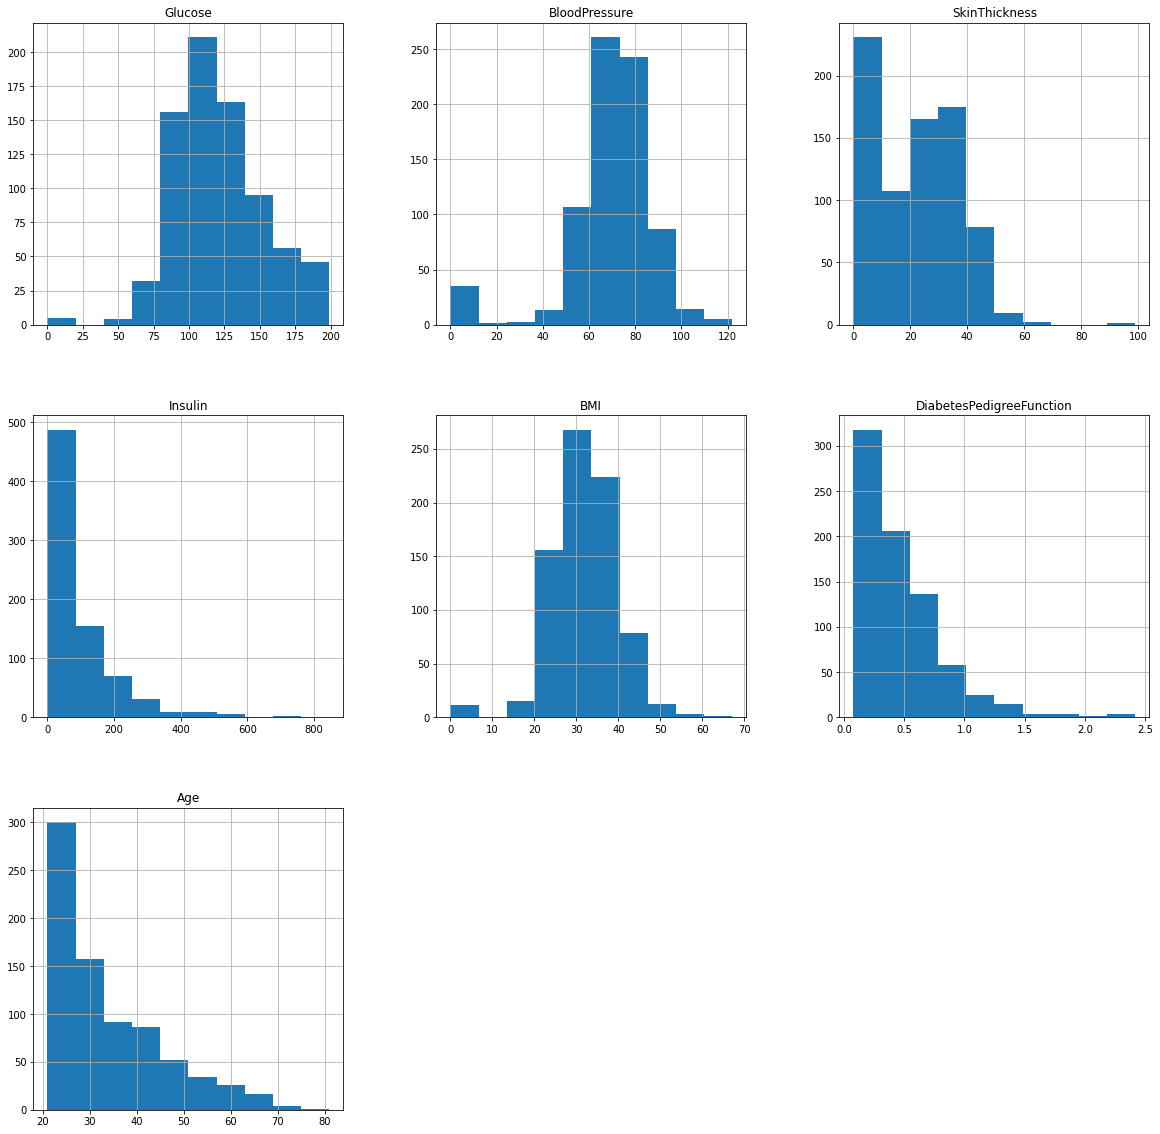

In [50]:
df1.hist(figsize =(20,20))
plt.show()

check meaningless values

In [51]:
try:
    print(f'the number of 0 values in {df.columns[1]} is {df[df.columns[1]].value_counts()[0]}')
except:
    print(f'the number of 0 values in {df.columns[1]} is 0')
try:
    print(f'the number of 0 values in {df.columns[2]} is {df[df.columns[2]].value_counts()[0]}')
except:
    print(f'the number of 0 values in {df.columns[2]} is 0')
try:
    print(f'the number of 0 values in {df.columns[3]} is {df[df.columns[3]].value_counts()[0]}')
except:
    print(f'the number of 0 values in {df.columns[3]} is 0')
try:
    print(f'the number of 0 values in {df.columns[4]} is {df[df.columns[4]].value_counts()[0]}')
except:
    print(f'the number of 0 values in {df.columns[4]} is 0')
try:
    print(f'the number of 0 values in {df.columns[5]} is {df[df.columns[5]].value_counts()[0]}')
except:
    print(f'the number of 0 values in {df.columns[5]} is 0')
try:
    print(f'the number of 0 values in {df.columns[6]} is {df[df.columns[6]].value_counts()[0]}')
except:
    print(f'the number of 0 values in {df.columns[6]} is 0')
try:
    print(f'the number of 0 values in {df.columns[7]} is {df[df.columns[7]].value_counts()[0]}')
except:
    print(f'the number of 0 values in {df.columns[7]} is 0')

the number of 0 values in Glucose is 5
the number of 0 values in BloodPressure is 35
the number of 0 values in SkinThickness is 227
the number of 0 values in Insulin is 374
the number of 0 values in BMI is 11
the number of 0 values in DiabetesPedigreeFunction is 0
the number of 0 values in Age is 0


In [52]:
df['Insulin'].replace(0,df['Insulin'].mean(),inplace=True)
df['Glucose'].replace(0,df['Glucose'].mean(),inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].replace(0,df['SkinThickness'].mean(),inplace=True)
df['BMI'].replace(0,df['BMI'].mean(),inplace=True)
df['DiabetesPedigreeFunction'].replace(0,df['DiabetesPedigreeFunction'].mean(),inplace=True)

In [53]:
X=df.drop('Outcome',axis=1)
Y=df[['Outcome']]

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [58]:
classifier=RandomForestClassifier(n_estimators=6,criterion='entropy',random_state=0)

In [59]:
classifier.fit(X_train,y_train.values.ravel())
y_pred=classifier.predict(X_test)
y_model_train = classifier.predict(X_train)
print(f"Accuracy_Score train = {format(metrics.accuracy_score(y_model_train,y_train))}")
print(f"Accuracy_Score test = {format(metrics.accuracy_score(y_pred,y_test))}")

Accuracy_Score train = 0.9674267100977199
Accuracy_Score test = 0.7662337662337663


**we have overfitting :( **

let's solve that problem of overfitting

**Let's optimize our model**

In [60]:
#GridSearchCV(model,param_grid,cv)
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = { "n_estimators"      : [250, 300],
           "criterion"         : ["gini", "entropy"],
           "max_features"      : [3, 5],
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4] ,
           "bootstrap": [True, False]}

In [62]:
grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
#grid = estimator , we fit it
grid.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20], 'max_features': [3, 5],
                         'min_samples_split': [2, 4],
                         'n_estimators': [250, 300]})

In [63]:
grid.best_score_

0.7557110489137677

In [64]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 3,
 'min_samples_split': 4,
 'n_estimators': 250}

In [65]:
model=grid.best_estimator_
model.score(X_test,y_test)

0.8181818181818182

In [66]:
y_pred=model.predict(X_test)
y_model_train = model.predict(X_train)
print(f"Accuracy_Score train = {format(metrics.accuracy_score(y_model_train,y_train))}")
print(f"Accuracy_Score test = {format(metrics.accuracy_score(y_pred,y_test))}")

Accuracy_Score train = 0.9853420195439739
Accuracy_Score test = 0.8181818181818182


In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix=confusion_matrix(y_test,model.predict(X_test))
confusion_matrix

array([[94, 13],
       [15, 32]], dtype=int64)

<AxesSubplot:>

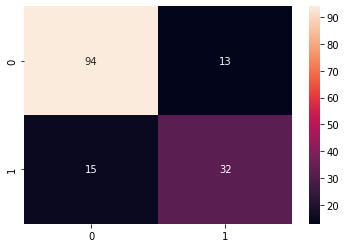

In [69]:
sns.heatmap(confusion_matrix, annot=True)

In [70]:
# grinning face
print(["\U0001f600" for i in range(10)])

['😀', '😀', '😀', '😀', '😀', '😀', '😀', '😀', '😀', '😀']
